# main.ipynb


In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV as LogReg
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import pandas as pd

In [33]:
# Load the data

labelled_data = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')
labelled_data.rename(columns={'Unnamed: 0': 'label'}, inplace=True)

vocabulary = list(labelled_data.columns.values)

labelled_data.head()



,label,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
unlabelled_data = pd.read_csv('AllBooks_baseline_DTM_Unlabelled.csv')
unlabelled_data.head()


,# foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# The below is for using the already vectorized BoW (bag of words) data
# and doing a TF-IDF transform on it and then feeding it into the model

from sklearn.preprocessing import LabelEncoder

# Assuming 'labelled_data' is your original dataframe
# 'labels' column is the one with text labels like "Buddhism_Ch1"

# Step 1: Separate labels from features
labels = labelled_data['label'].values  # This creates a separate array of labels
labelled_data = labelled_data.drop('label', axis=1)  # This drops the label column from the dataframe

# Step 2: Encode labels if necessary
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # This encodes text labels to numbers

# Finally, view output
labelled_data

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    labelled_data, encoded_labels, test_size=0.2, random_state=42  # For example, 20% data as test
)

In [37]:
# Checking output of train test split
print(X_train)
print(X_test)
print(y_train)
print(y_test)
# Seems like it works but not sure
# The below is for using the already vectorized BoW (bag of words) data

     foolishness  hath  wholesome  takest  feelings  anger  vaivaswata  \
131            0     0          0       0         0      0           0   
153            0     0          0       0         0      1           0   
77             0     0          0       0         0      0           0   
439            0     0          0       0         0      0           0   
255            0     0          0       0         0      0           0   
..           ...   ...        ...     ...       ...    ...         ...   
71             0     0          0       0         0      0           0   
106            0     0          0       0         0      0           0   
270            0     0          0       0         0      0           0   
435            0     0          0       0         0      0           0   
102            0     0          0       0         0      0           0   

     matrix  kindled  convict  ...  erred  thinkest  modern  reigned  \
131       0        0        0  ...     

In [38]:
# Manual pipeline from scratch, going from text corpus to the final tf-idf transformed data

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
corpus = ["""0.1 § 1.The Buddha: "What do you think, Rahula: What is a mirror for?"The Buddha:Rahula: "For reflection, sir."Rahula:The Buddha: "In the same way, Rahula, bodily acts, verbal acts, & mental acts are to be done with repeated reflection.The Buddha:"Whenever you want to perform a bodily act, you should reflect on it: 'This bodily act I want to perform — would it lead to self-affliction, to the affliction of others, or to both? Is it an unskillful bodily act, with painful consequences, painful results?' If, on reflection, you know that it would lead to self-affliction, to the affliction of others, or to both; it would be an unskillful bodily act with painful consequences, painful results, then any bodily act of that sort is absolutely unfit for you to do. But if on reflection you know that it would not cause affliction... it would be a skillful bodily act with happy consequences, happy results, then any bodily act of that sort is fit for you to do.(Similarly with verbal acts & mental acts.)"While you are performing a bodily act, you should reflect on it: 'This bodily act I am doing — is it leading to self-affliction, to the affliction of others, or to both? Is it an unskillful bodily act, with painful consequences, painful results?' If, on reflection, you know that it is leading to self-affliction, to affliction of others, or both... you should give it up. But if on reflection you know that it is not... you may continue with it.(Similarly with verbal acts & mental acts.)"Having performed a bodily act, you should reflect on it... If, on reflection, you know that it led to self-affliction, to the affliction of others, or to both; it was an unskillful bodily act with painful consequences, painful results, then you should confess it, reveal it, lay it open to the Teacher or to a knowledgeable companion in the holy life. Having confessed it... you should exercise restraint in the future. But if on reflection you know that it did not lead to affliction... it was a skillful bodily act with happy consequences, happy results, then you should stay mentally refreshed & joyful, training day & night in skillful mental qualities.(Similarly with verbal acts.)"Having performed a mental act, you should reflect on it... If, on reflection, you know that it led to self-affliction, to the affliction of others, or to both; it was an unskillful mental act with painful consequences, painful results, then you should feel horrified, humiliated, & disgusted with it. Feeling horrified... you should exercise restraint in the future. But if on reflection you know that it did not lead to affliction... it was a skillful mental act with happy consequences, happy results, then you should stay mentally refreshed & joyful, training day & night in skillful mental qualities."Rahula, all the brahmans & contemplatives in the course of the past who purified their bodily acts, verbal acts, & mental acts, did it through repeated reflection on their bodily acts, verbal acts, & mental acts in just this way."All the brahmans & contemplatives in the course of the future... All the brahmans & contemplatives at present who purify their bodily acts, verbal acts, & mental acts, do it through repeated reflection on their bodily acts, verbal acts, & mental acts in just this way."And so, Rahula, you should train yourself: 'I will purify my bodily acts through repeated reflection. I will purify my verbal acts through repeated reflection. I will purify my mental acts through repeated reflection.' That's how you should train yourself."That is what the Blessed One said. Gratified, Ven. Rahula delighted in the Blessed One's words."""]

# words = labelled_data
# vocabulary = words.split()
vocabulary = vocabulary
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                 ('tfid', TfidfTransformer())]).fit(corpus)
pipe['count'].transform(corpus).toarray()
# pipe['tfid'].idf_
# pipe.transform(corpus).shape

c:\Users\lichr\github\gateway-ds-nlp\.venv\lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
# Checking output
l = pipe['count'].transform(corpus).toarray()
print(type(l))
print(l[0,:20])

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [40]:
# Final tf-idf transformed data
pipe['tfid'].idf_


array([1.69314718, 1.69314718, 1.69314718, ..., 1.69314718, 1.69314718,
       1.69314718])

In [41]:
# Trying to skip the CountVectorizer step and directly feed the data into the TfidfTransformer
# since the spreadsheet already has the word counts, so
# effectively the spreadsheet is already the output of the CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)


In [42]:
print(X_train_tfidf)

  (0, 7988)	0.10542342181184543
  (0, 7943)	0.1794193833608382
  (0, 7839)	0.14705491069203877
  (0, 7687)	0.16817122083060915
  (0, 7246)	0.06643846465433907
  (0, 7199)	0.16509787605640683
  (0, 7104)	0.09392911763707817
  (0, 6573)	0.19602046758423433
  (0, 6283)	0.17153768913813658
  (0, 5514)	0.14705491069203877
  (0, 5144)	0.2545772380158718
  (0, 4846)	0.2283849402530338
  (0, 4315)	0.19025312109908074
  (0, 3969)	0.2283849402530338
  (0, 3755)	0.18630559329919075
  (0, 3503)	0.0881495328070912
  (0, 3422)	0.09092124310043687
  (0, 3229)	0.16817122083060915
  (0, 3154)	0.14533158437230395
  (0, 3023)	0.12346638717621346
  (0, 2756)	0.3055905431002843
  (0, 2744)	0.08527110242689373
  (0, 2447)	0.24003536183978186
  (0, 2128)	0.15077636875197542
  (0, 1784)	0.16227067292674266
  :	:
  (471, 3184)	0.09078744031016364
  (471, 3163)	0.09674159038178214
  (471, 3148)	0.41091135503311077
  (471, 2657)	0.06679473727253778
  (471, 2638)	0.09854246310255711
  (471, 2528)	0.10051509597839

In [43]:
from sklearn.naive_bayes import MultinomialNB
# Assuming 'X' is your frequency matrix and 'y' is your target array
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)  # # Train model on TF-IDF scaled data
print("Model accuracy:", model.score(X_test_tfidf, y_test))  # Evaluating the model


Model accuracy: 0.0


In [44]:
# Debugging why the model is not working and accuracy is 0.0

# View some of the TF-IDF features
print(X_train_tfidf[0])



  (0, 7988)	0.10542342181184543
  (0, 7943)	0.1794193833608382
  (0, 7839)	0.14705491069203877
  (0, 7687)	0.16817122083060915
  (0, 7246)	0.06643846465433907
  (0, 7199)	0.16509787605640683
  (0, 7104)	0.09392911763707817
  (0, 6573)	0.19602046758423433
  (0, 6283)	0.17153768913813658
  (0, 5514)	0.14705491069203877
  (0, 5144)	0.2545772380158718
  (0, 4846)	0.2283849402530338
  (0, 4315)	0.19025312109908074
  (0, 3969)	0.2283849402530338
  (0, 3755)	0.18630559329919075
  (0, 3503)	0.0881495328070912
  (0, 3422)	0.09092124310043687
  (0, 3229)	0.16817122083060915
  (0, 3154)	0.14533158437230395
  (0, 3023)	0.12346638717621346
  (0, 2756)	0.3055905431002843
  (0, 2744)	0.08527110242689373
  (0, 2447)	0.24003536183978186
  (0, 2128)	0.15077636875197542
  (0, 1784)	0.16227067292674266
  (0, 1702)	0.08781787606938973
  (0, 1134)	0.17525914719807323
  (0, 895)	0.12084880592620614
  (0, 679)	0.40780432361387203
  (0, 535)	0.17153768913813658


KeyboardInterrupt: 

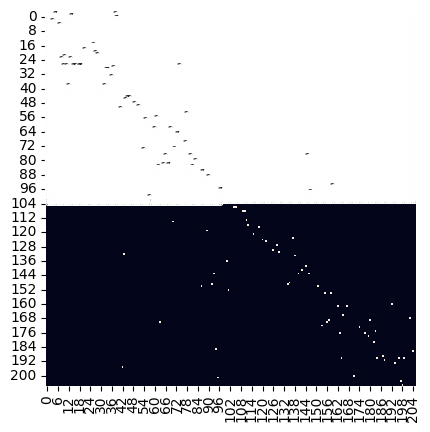

In [45]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns


# not sure what this line is supposed to be
# mat = confusion_matrix(test.target, labels)
mat = confusion_matrix(y_test, model.predict(X_test_tfidf))

sns.heatmap(
  mat.T, square=True, annot=True, fmt='d', cbar=False
  # ,xticklabels=train.target_names, yticklabels=train.target_names
)

plt.xlabel('true label')
plt.ylabel('predicted label')

